# Comparing Suburbs and Identifying Clusters

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns 
%matplotlib inline

## Data Imports 

In [3]:
# 2016-2017 Data
df = pd.read_excel(open('data/ts17individual06taxablestatusstatepostcode.xlsx', 'rb'),sheet_name='Individuals Table 6A', skiprows=2) 

In [4]:
df = df.dropna()
df.head()

,Taxable status,State/ Territory1,Postcode,Number of individuals\nno.,Taxable income or loss3\nno.,Taxable income or loss3\n$,Tax on taxable income\nno.,Tax on taxable income\n$,Medicare levy\nno.,Medicare levy\n$,...,Small business income tax offset\n$,Low income tax offset\nno.,Low income tax offset\n$,People with private health insurance\nno.,Private health insurance - your Australian Government rebate received\nno.,Private health insurance - your Australian Government rebate received\n$,Private health insurance rebate\nno.,Private health insurance rebate\n$,Excess private health reduction or refund (rebate reduced)\nno.,Excess private health reduction or refund (rebate reduced)\n$
0,Non Taxable,ACT,2600,990,955,12178035,252,600927.61,12,18965.56,...,35.70,167,52893.45,709,485,438487,62,31311.95,54,26106.34
1,Non Taxable,ACT,2601,926,900,8450463,106,100352.34,2,2035.10,...,0.00,71,18469.66,360,128,92163,36,11833.38,9,3535.81
2,Non Taxable,ACT,2602,3940,3827,47998008,975,1233763.38,15,13376.38,...,224.42,609,180083.00,2093,1279,906389,148,51957.17,127,36297.11
3,Non Taxable,ACT,2603,1038,987,11801187,262,328895.92,8,8044.22,...,22.02,168,48477.62,678,435,364649,52,24361.23,55,25994.12
4,Non Taxable,ACT,2604,1174,1128,12936892,282,339046.69,6,2922.44,...,73.66,176,50491.51,690,464,337944,71,28828.31,62,23169.06


## NSW dataframe

In [5]:
df_nsw = df[df['State/ Territory1'] == 'NSW']
df_nsw

,Taxable status,State/ Territory1,Postcode,Number of individuals\nno.,Taxable income or loss3\nno.,Taxable income or loss3\n$,Tax on taxable income\nno.,Tax on taxable income\n$,Medicare levy\nno.,Medicare levy\n$,...,Small business income tax offset\n$,Low income tax offset\nno.,Low income tax offset\n$,People with private health insurance\nno.,Private health insurance - your Australian Government rebate received\nno.,Private health insurance - your Australian Government rebate received\n$,Private health insurance rebate\nno.,Private health insurance rebate\n$,Excess private health reduction or refund (rebate reduced)\nno.,Excess private health reduction or refund (rebate reduced)\n$
29,Non Taxable,NSW,1225,10,10,18093,1,1783.15,0,0.00,...,0.00,0,0.00,1,1,171,0,0.00,0,0.00
30,Non Taxable,NSW,1230,18,16,145316,6,6465.13,0,0.00,...,0.00,3,715.95,11,11,8987,0,0.00,0,0.00
31,Non Taxable,NSW,1235,145,144,1632937,34,12210.69,0,0.00,...,32.85,29,8252.25,17,13,6325,5,349.55,0,0.00
32,Non Taxable,NSW,1240,19,16,22399,3,521.74,0,0.00,...,0.00,3,521.74,6,6,3635,0,0.00,1,4.43
33,Non Taxable,NSW,1335,18,17,168662,5,5451.48,0,0.00,...,0.00,1,371.83,11,11,7667,1,212.86,2,210.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382,Taxable,NSW,2879,159,159,10433483,159,2174508.87,146,195073.50,...,11297.38,103,31730.00,74,56,34808,17,3821.94,18,8221.08
3383,Taxable,NSW,2880,6744,6744,448101009,6743,93737521.97,6293,8452989.07,...,262024.78,4138,1332036.00,4013,3454,2316626,565,203261.86,798,302136.93
3384,Taxable,NSW,2898,225,225,19047629,225,5038543.95,213,367321.49,...,15717.05,154,49320.00,132,118,74847,15,7349.46,26,13756.57
3385,Taxable,NSW,2899,776,776,41368303,776,7391167.75,745,766987.07,...,40611.81,630,217721.06,329,303,158118,35,7579.17,36,12132.09


### Taxable Income or Loss

In [6]:
df_nsw_taxable_income = df_nsw[['Postcode', 'Taxable income or loss3\n$']].copy()
df_nsw_taxable_income = df_nsw_taxable_income.rename(columns={'Taxable income or loss3\n$': 'Taxable income or loss'})
df_nsw_taxable_income = df_nsw_taxable_income[df_nsw_taxable_income['Postcode'] != 'NSW other']
df_nsw_taxable_income

,Postcode,Taxable income or loss
29,1225,18093
30,1230,145316
31,1235,1632937
32,1240,22399
33,1335,168662
...,...,...
3381,2878,11617426
3382,2879,10433483
3383,2880,448101009
3384,2898,19047629


Calculate the standard square to understand how many clusters we should pick

In [7]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_nsw_taxable_income)
    sse.append(km.inertia_)

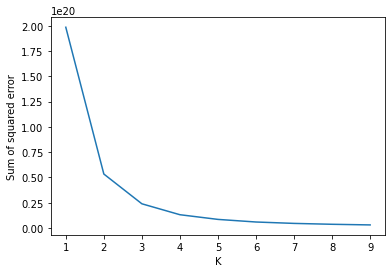

In [8]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

- From the graph above, we see that it elbows at around k = 4. We will use our value of k as 4.** 

In [9]:
km = KMeans(n_clusters=4)
yp = km.fit_predict(df_nsw_taxable_income)

df_nsw_taxable_income['cluster'] = yp

df1 = df_nsw_taxable_income[df_nsw_taxable_income.cluster==0]
df2 = df_nsw_taxable_income[df_nsw_taxable_income.cluster==1]
df3 = df_nsw_taxable_income[df_nsw_taxable_income.cluster==2]
df4 = df_nsw_taxable_income[df_nsw_taxable_income.cluster==3]
df1.head()

,Postcode,Taxable income or loss,cluster
29,1225,18093,0
30,1230,145316,0
31,1235,1632937,0
32,1240,22399,0
33,1335,168662,0


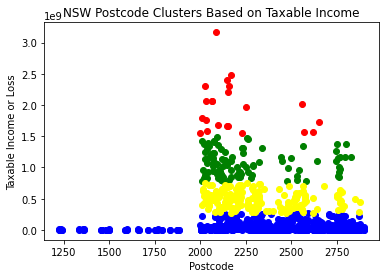

In [10]:
plt.title("NSW Postcode Clusters Based on Taxable Income")
plt.xlabel("Postcode")
plt.ylabel("Taxable Income or Loss")

plt.scatter(df1['Postcode'],df1['Taxable income or loss'],color='blue')
plt.scatter(df2['Postcode'],df2['Taxable income or loss'],color='green')
plt.scatter(df3['Postcode'],df3['Taxable income or loss'],color='yellow')
plt.scatter(df4['Postcode'],df4['Taxable income or loss'],color='red')

### Salary/Wages

In [11]:
df_nsw_salary_wages = df_nsw[['Postcode', 'Salary or wages\n$']].copy()
df_nsw_salary_wages = df_nsw_salary_wages.rename(columns={'Salary or wages\n$': 'Salary/Wages'})
df_nsw_salary_wages = df_nsw_salary_wages[df_nsw_salary_wages['Postcode'] != 'NSW other']
df_nsw_salary_wages

,Postcode,Salary/Wages
29,1225,24000
30,1230,49798
31,1235,1350561
32,1240,55419
33,1335,113488
...,...,...
3381,2878,4375380
3382,2879,7743332
3383,2880,391615140
3384,2898,9642018


In [12]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_nsw_taxable_income)
    sse.append(km.inertia_)

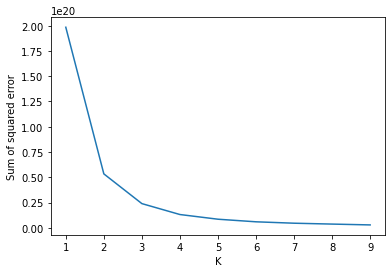

In [13]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [14]:
km = KMeans(n_clusters=4)
yp = km.fit_predict(df_nsw_salary_wages)

df_nsw_salary_wages['cluster'] = yp

df1 = df_nsw_salary_wages[df_nsw_salary_wages.cluster==0]
df2 = df_nsw_salary_wages[df_nsw_salary_wages.cluster==1]
df3 = df_nsw_salary_wages[df_nsw_salary_wages.cluster==2]
df4 = df_nsw_salary_wages[df_nsw_salary_wages.cluster==3]

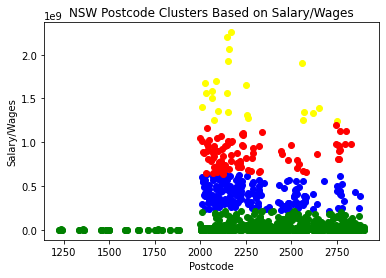

In [15]:
plt.title("NSW Postcode Clusters Based on Salary/Wages")
plt.xlabel("Postcode")
plt.ylabel("Salary/Wages")

plt.scatter(df1['Postcode'],df1['Salary/Wages'],color='blue')
plt.scatter(df2['Postcode'],df2['Salary/Wages'],color='green')
plt.scatter(df3['Postcode'],df3['Salary/Wages'],color='yellow')
plt.scatter(df4['Postcode'],df4['Salary/Wages'],color='red')

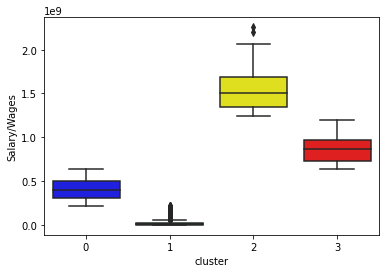

In [16]:
palette = ['blue', 'green','yellow','red']
ax = sns.boxplot(x="cluster", y="Salary/Wages", data=df_nsw_salary_wages, palette=palette)

## Victoria dataframe

In [17]:
df_vic = df[df['State/ Territory1'] == 'VIC']
df_vic

,Taxable status,State/ Territory1,Postcode,Number of individuals\nno.,Taxable income or loss3\nno.,Taxable income or loss3\n$,Tax on taxable income\nno.,Tax on taxable income\n$,Medicare levy\nno.,Medicare levy\n$,...,Small business income tax offset\n$,Low income tax offset\nno.,Low income tax offset\n$,People with private health insurance\nno.,Private health insurance - your Australian Government rebate received\nno.,Private health insurance - your Australian Government rebate received\n$,Private health insurance rebate\nno.,Private health insurance rebate\n$,Excess private health reduction or refund (rebate reduced)\nno.,Excess private health reduction or refund (rebate reduced)\n$
1617,Non Taxable,VIC,3000,7951,7515,70828400,1237,756179.09,13,20169.94,...,146.92,1102,283411.00,1353,837,524875,221,51509.01,68,24568.10
1618,Non Taxable,VIC,3001,93,90,239661,9,10545.85,0,0.00,...,0.00,4,1117.00,29,17,16150,2,2448.16,2,272.98
1619,Non Taxable,VIC,3002,620,567,7095186,147,300036.20,5,8688.28,...,206.17,97,28234.63,384,301,265520,37,15175.33,37,12725.55
1620,Non Taxable,VIC,3003,986,944,9828829,193,81031.81,1,827.74,...,36.65,164,40601.83,265,166,108483,24,6065.77,13,2887.40
1621,Non Taxable,VIC,3004,1542,1417,13919356,310,293278.63,7,4271.54,...,290.54,215,58315.00,777,636,561786,76,27835.11,36,12879.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,Taxable,VIC,3991,127,127,6209207,127,1015654.92,112,111752.30,...,4852.39,105,36927.51,44,38,25136,8,2651.50,5,1502.05
5016,Taxable,VIC,3992,348,348,19538554,348,3705265.05,318,364894.58,...,24311.24,266,88382.20,109,101,58424,6,2500.34,16,3268.88
5017,Taxable,VIC,3995,3517,3517,192344648,3516,35081500.02,3197,3514743.00,...,177458.44,2689,923778.48,1139,1016,654525,116,31010.64,222,89312.75
5018,Taxable,VIC,3996,2035,2035,135547468,2035,28853800.08,1893,2544274.43,...,136434.85,1310,439038.56,1126,1039,721452,99,26475.74,294,133360.52


### Taxable Income or Loss

In [18]:
df_vic_taxable_income = df_vic[['Postcode', 'Taxable income or loss3\n$']].copy()
df_vic_taxable_income = df_vic_taxable_income.rename(columns={'Taxable income or loss3\n$': 'Taxable income or loss'})
df_vic_taxable_income = df_vic_taxable_income[df_vic_taxable_income['Postcode'] != 'VIC other']
df_vic_taxable_income

,Postcode,Taxable income or loss
1617,3000,70828400
1618,3001,239661
1619,3002,7095186
1620,3003,9828829
1621,3004,13919356
...,...,...
5014,3990,3447454
5015,3991,6209207
5016,3992,19538554
5017,3995,192344648


In [19]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_vic_taxable_income)
    sse.append(km.inertia_)

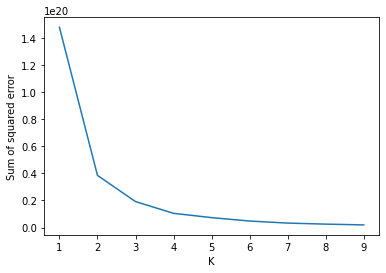

In [20]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [21]:
km = KMeans(n_clusters=4)
yp = km.fit_predict(df_vic_taxable_income)

df_vic_taxable_income['cluster'] = yp

df1 = df_vic_taxable_income[df_vic_taxable_income.cluster==0]
df2 = df_vic_taxable_income[df_vic_taxable_income.cluster==1]
df3 = df_vic_taxable_income[df_vic_taxable_income.cluster==2]
df4 = df_vic_taxable_income[df_vic_taxable_income.cluster==3]
df1.head()

,Postcode,Taxable income or loss,cluster
4320,3002,465758968,0
4322,3004,640731158,0
4324,3008,548511977,0
4326,3011,704884104,0
4328,3013,650313022,0


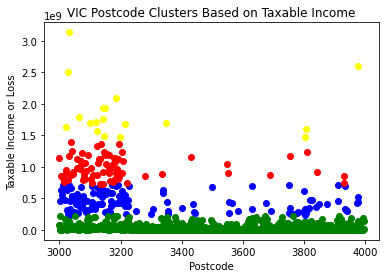

In [22]:
plt.title("VIC Postcode Clusters Based on Taxable Income")
plt.xlabel("Postcode")
plt.ylabel("Taxable Income or Loss")

plt.scatter(df1['Postcode'],df1['Taxable income or loss'],color='blue')
plt.scatter(df2['Postcode'],df2['Taxable income or loss'],color='green')
plt.scatter(df3['Postcode'],df3['Taxable income or loss'],color='yellow')
plt.scatter(df4['Postcode'],df4['Taxable income or loss'],color='red')

### Salary/Wages

In [23]:
df_vic_salary_wages = df_vic[['Postcode', 'Salary or wages\n$']].copy()
df_vic_salary_wages = df_vic_salary_wages.rename(columns={'Salary or wages\n$': 'Salary/Wages'})
df_vic_salary_wages = df_vic_salary_wages[df_vic_salary_wages['Postcode'] != 'VIC other']
df_vic_salary_wages

,Postcode,Salary/Wages
1617,3000,59170073
1618,3001,150605
1619,3002,3531588
1620,3003,7520174
1621,3004,8156904
...,...,...
5014,3990,2561988
5015,3991,5454656
5016,3992,14858042
5017,3995,150330074


In [24]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_vic_taxable_income)
    sse.append(km.inertia_)

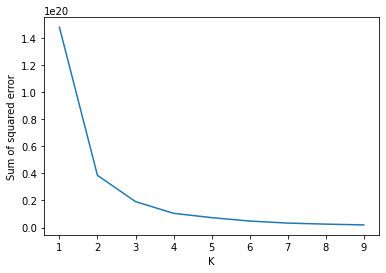

In [25]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [26]:
km = KMeans(n_clusters=4)
yp = km.fit_predict(df_vic_salary_wages)

df_vic_salary_wages['cluster'] = yp

df1 = df_vic_salary_wages[df_vic_salary_wages.cluster==0]
df2 = df_vic_salary_wages[df_vic_salary_wages.cluster==1]
df3 = df_vic_salary_wages[df_vic_salary_wages.cluster==2]
df4 = df_vic_salary_wages[df_vic_salary_wages.cluster==3]

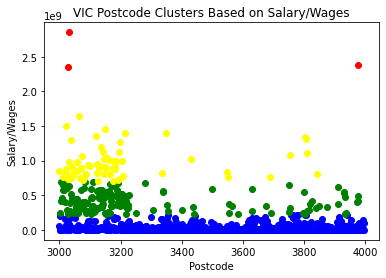

In [27]:
plt.title("VIC Postcode Clusters Based on Salary/Wages")
plt.xlabel("Postcode")
plt.ylabel("Salary/Wages")

plt.scatter(df1['Postcode'],df1['Salary/Wages'],color='blue')
plt.scatter(df2['Postcode'],df2['Salary/Wages'],color='green')
plt.scatter(df3['Postcode'],df3['Salary/Wages'],color='yellow')
plt.scatter(df4['Postcode'],df4['Salary/Wages'],color='red')